In [1]:
# Install the API depedencies and inductiva modules
!pip install inductiva

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.8/38.8 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.7/167.7 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.4 MB/s eta 0:00:00


# Design your DamBreak scenario 


Simple scenarios have great strength when equipped with the ability to change some of the design parameters. 

In this notebook, we demonstrate how simple it is to interact with Inductiva API by customizing the input parameters of a DamBreak scenario.

Recall that, a dambreak scenario describes the dynamics of a simple fluid block subject only to gravity and internal forces.



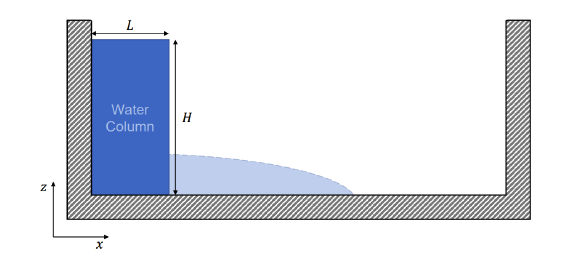



First, import `inductiva` and the `fluids` module and set up your user API token.

In [2]:
# Import inductiva modules and dependencies
import inductiva
from inductiva import fluids

# Set the provided API token to be able to access our hardware
inductiva.api_key = "ADD_KEY_HERE"

Let's start by setting the fluid block **position** and **dimensions**. Feel free to experiment with different values and observe the variations!

In [3]:
# Set the position and dimensions
block_position = (0., 0., 0.)
block_dimensions = (0.5, 1., 0.3)

In [5]:
# Pass these parameters to the scenario
scenario = fluids.scenarios.DamBreak(position=block_position,
                                     dimensions=block_dimensions)

#from google.colab import drive
#drive.mount('/content/gdrive')

#inductiva.working_dir = "/content/gdrive/MyDrive/API_Tutorials/"



In [ ]:
# Simulate this scenario
sim_output = scenario.simulate(output_dir="outputs")
# Render a simulation movie
video = sim_output.render()
video

## Simulation parameters

As you might have noticed, the simulation and video is too short... We want to see more of the dynamics of the fluid. 

Sometimes, we may also want to play with the resolution of the simulation!
<br>
<br>

For the DamBreak scenario we give control to:
- the **resolution** ("low", "medium", "high");
- the **simulation time** (in seconds).

In [9]:
sim_output = scenario.simulate(resolution="medium",
                               simulation_time=2.,
                               device="gpu")

INFO:absl:Estimated number of particles 9020
INFO:absl:Estimated number of time steps 2000
INFO:absl:Number of output time steps 120
INFO:absl:Request submitted.
INFO:absl:An executer has picked up the request.
INFO:absl:The requested task is being executed remotely...
INFO:absl:Task executed successfuly.
INFO:absl:Converting vtk files to netcdf format...
100%|██████████| 121/121 [00:01<00:00, 110.56it/s]


In [10]:
# Render a simulation movie
video = sim_output.render()
video

INFO:absl:Creating movie frames...
100%|██████████| 121/121 [00:40<00:00,  2.99it/s]
INFO:absl:Finished creating movie frames.
INFO:absl:Creating movie '/tmp/tmplkouwgo6-output-2023-04-04T16h46m37s/movie.mp4'.


# Accelerating the simulations

By now you may be a bit tired of waiting so long for the simulations to finish! Especially, if you set the resolution to "high" the simulation will take too long to run!

This is because we have been running simulations solely on CPU. SPH simulations are computationally intensive, therefore the CPU may not be powerful enough to efficiently perform the large number of calculations. 

Happily, it is possible to simply run these simulations on GPU and they are much faster 😀 

In [ ]:
gpu_output = scenario.simulate(device="gpu",
                               resolution="low",
                               simulation_time=2.)

INFO:absl:Estimated number of particles 3192
INFO:absl:Estimated number of time steps 2000
INFO:absl:Number of output time steps 120
INFO:absl:Request submitted.
INFO:absl:An executer has picked up the request.
INFO:absl:The requested task is being executed remotely...
INFO:absl:Task executed successfuly.
INFO:absl:Converting vtk files to netcdf format...
100%|██████████| 121/121 [00:01<00:00, 97.02it/s]


In [ ]:
video = gpu_output.render()
video

INFO:absl:Creating movie frames...
100%|██████████| 121/121 [00:42<00:00,  2.82it/s]
INFO:absl:Finished creating movie frames.
INFO:absl:Creating movie '/tmp/tmp17_4a_vp-output-2023-04-03T15h08m34s/movie.mp4'.


We have come a long way and by now you know how to run a simple but ellaborate DamBreak scenario. 

**Inductiva API** makes simulating *simple*!

Check out our [tutorials]() to interact through more scenarios! 